Convolutional Neural Networks (CNNs) are the current state-of-art architecture mainly used for the image classification tasks.

Step 1 :Importing the module

In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist

# Divide into training and test dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train.shape


(60000, 28, 28)

This mens each of these images is 28 pixels wide and 28 pixels high

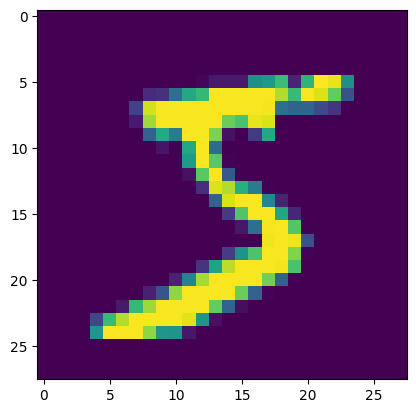

<function matplotlib.pyplot.show(close=None, block=None)>

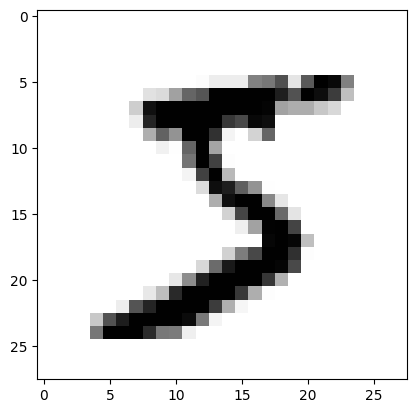

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap = plt.cm.binary)#to convert it into the grey scale
plt.show

Step 2: Normalization
black and white but the value ranges from [0-255].  But for training, we have to convert this into [0-1].

The image is : 5 




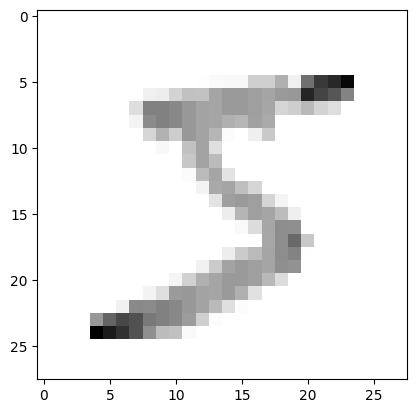

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)
print("The image is :",y_train[0],"\n\n")#to verify if this set has the right label


Step 3: Resizing the image for the CNN model

In [ ]:
import numpy as np
IMG_SIZE=28

x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training Samples dimension", x_trainr.shape)
print("Testing Samples dimension", x_testr.shape)


Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


Step 4: Creating the nueral network model

Five imp layers

1.Sequential - A feedforward neural network

2.Dense - A typical layer in our model

3.Dropout - Is used to make the neural network more robust, by reducing overfitting

4.Flatten - It is used to flatten the data for use in the dense layer

5.Conv2d - We will be using a 2-Dimensional CNN

6.MaxPooling2D - Pooling mainly helps in extracting sharp and smooth features. It is also done to reduce variance and computations. Max-pooling helps in extracting low-level features like edges, points, etc. While Avg-pooling goes for smooth features.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

model = Sequential()

### First
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:])) # For first layer we have to mention the size of input
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

### Second
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

### Third
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

### connected layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

### connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

### output layer
model.add(Dense(10))
model.add(Activation("softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_7 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

After each layer the filters increases. This is because of how CNN works. After each layer, more complex features are detected and for it, more filters are used.

Step 5: Compile and train the model

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

model.fit(x_trainr, y_train, epochs=5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 89s 67ms/step - loss: 0.3029 - accuracy: 0.9054 - val_loss: 0.1125 - val_accuracy: 0.9646
Epoch 2/5
1313/1313 [==============================] - 83s 63ms/step - loss: 0.1006 - accuracy: 0.9691 - val_loss: 0.1125 - val_accuracy: 0.9669
Epoch 3/5
1313/1313 [==============================] - 80s 61ms/step - loss: 0.0740 - accuracy: 0.9773 - val_loss: 0.0868 - val_accuracy: 0.9734
Epoch 4/5
1313/1313 [==============================] - 82s 63ms/step - loss: 0.0557 - accuracy: 0.9824 - val_loss: 0.0685 - val_accuracy: 0.9801
Epoch 5/5
1313/1313 [==============================] - 80s 61ms/step - loss: 0.0455 - accuracy: 0.9860 - val_loss: 0.0660 - val_accuracy: 0.9813


Step 6: Predicting the model

313/313 [==============================] - 4s 14ms/step
[[5.5119589e-09 2.2841011e-06 4.3462867e-05 ... 9.9995059e-01
  7.0572885e-09 2.0689905e-07]
 [3.2057130e-07 1.1551750e-06 9.9999064e-01 ... 9.3695974e-07
  1.0368984e-06 9.6394013e-09]
 [8.4004848e-09 9.9999624e-01 4.3092410e-08 ... 8.6707917e-07
  2.1154507e-07 1.0710256e-08]
 ...
 [3.7518174e-13 1.4606445e-08 1.1931407e-10 ... 2.6541980e-09
  1.9549714e-07 6.9532375e-06]
 [3.3241342e-04 1.7192569e-08 9.0901381e-07 ... 1.9499204e-08
  1.6973645e-04 5.7593579e-06]
 [5.6605404e-06 6.2752271e-08 7.7510765e-07 ... 2.7465122e-10
  1.0643536e-05 4.1293664e-08]] 


The Number scanned is  7


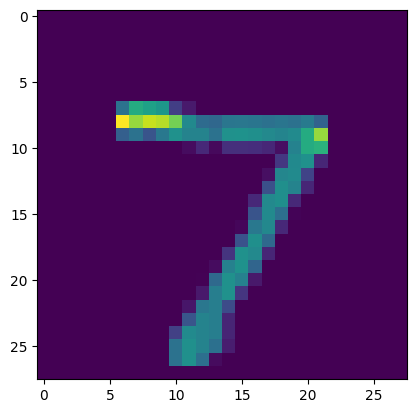

In [ ]:
predictions = model.predict([x_testr])
print(predictions,"\n\n")

plt.imshow(x_test[0])
print("The Number scanned is ",np.argmax(predictions[0]))


Step 7: Testing the model of a image
(found in kaggle)

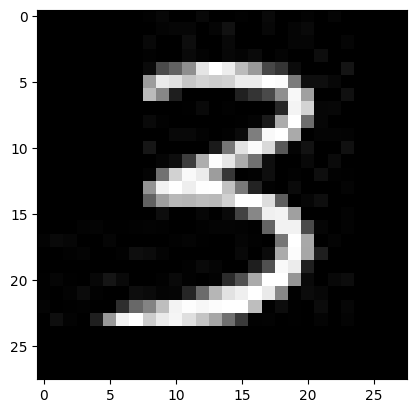

In [ ]:
import cv2
img = cv2.imread('testimage.jpg')
plt.imshow(img)


In [ ]:
img.shape

(28, 28, 3)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#converting into grayscale

newimg = tf.keras.utils.normalize(gray, axis = 1)# 0-1 scaling
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)# For kernal operations

predictions = model.predict(newimg)
print("The handwritten number written is ",np.argmax(predictions[0]))


1/1 [==============================] - 0s 26ms/step
The handwritten number written is  3
